<a href="https://colab.research.google.com/github/gggggeun/study/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 회귀분석(Linear Regression)

회귀분석(regression)은 머신러닝 알고리즘 중에서도 비교적 이해하기 쉽고, 널리 활용되고 있는 대표적은 알고리즘이며 **연속 변수**를 예측하는데 주로 활용된다.
모형의 예측값인 종속 변수에 대한 실제 데이터를 알고 있는 상태에서 학습하기 때문에 지도학습으로 분류된다.

---

> 들여쓴 블록


* 종속변수(dependent) : 분석 모델이 예측하고자 하는 목표 

   = 예측변수(predictior) = **특성(Feature)**

* 독립변수(independent) : 예측을 위해 모델이 사용하는 속성

   = 설명변수(exlanatory) = **타겟(Target) = Label**

---
회귀분석 방법
1. 데이터 전처리 후 특성데이터(Feature)과 타겟데이터(Target)를 고른다.
2. 가지고 있는 데이터를 훈련데이터와 테스트데이터로 나눈다. ex) 7:3
3. 훈련데이터로 예측모델을 만든다.
4. 테스트데이터의 feature data를 모델에 넣어 Target data를 예측한다.


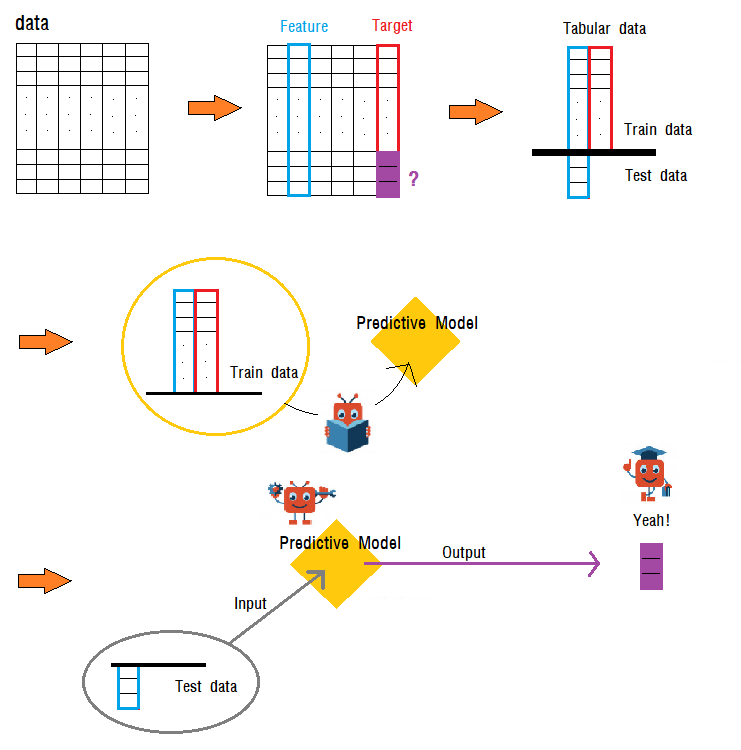

<img src="https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/_images/plot_ML_flow_chart_1.png" width="75%">

[참고](https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/tutorial/text_analytics/general_concepts.html#supervised-learning-model-fit-x-y)

# Feature engineering

## dataset 불러오기

[Kaggle ](https://www.kaggle.com/harlfoxem/housesalesprediction) 

Dataset : House Sales in King County, USA 

집 값에 대한 예측모델만들기
- Target data : price 

In [ ]:
import pandas as pd
from google.colab import files
files.upload()

In [13]:
# Dataset
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Feature data 고르기

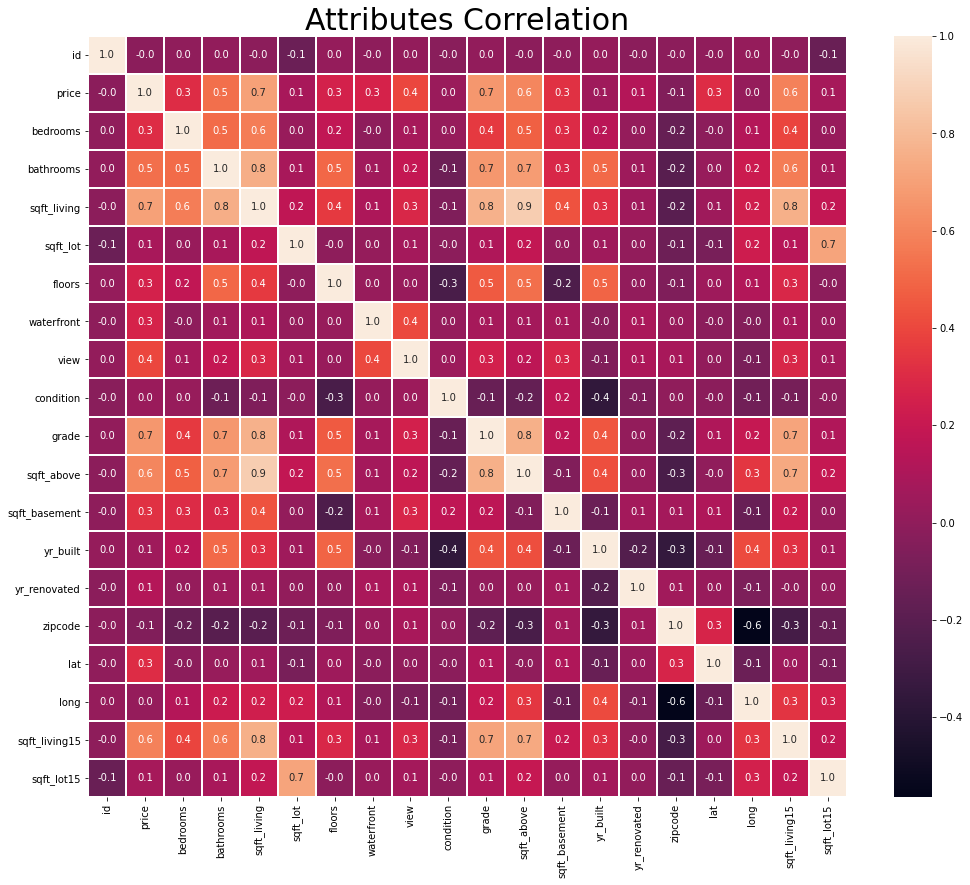

In [8]:
# Correlation 상관관계를 보고 특성 고르기

import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(17,14))
sns.heatmap(df.corr(), annot=True, linewidths='1', fmt="1.1f")
plt.title('Attributes Correlation', fontsize=30)
plt.show()

## Train data와 Test data 나누기
2014년 데이터를 train data로 2015년 데이터를 test data로 나누어보자.

In [30]:
# 2014년 train data
train = df.query('date.str.contains("2014")', engine='python')
train = train[['date','price','sqft_living','grade','sqft_above']]
train.head()

,date,price,sqft_living,grade,sqft_above
0,20141013T000000,221900.0,1180,7,1180
1,20141209T000000,538000.0,2570,7,2170
3,20141209T000000,604000.0,1960,7,1050
5,20140512T000000,1225000.0,5420,11,3890
6,20140627T000000,257500.0,1715,7,1715


In [31]:
# 2015년 test data
test=df.drop(train.index)
test=test[['date','price','sqft_living','grade','sqft_above']]
test.head()

,date,price,sqft_living,grade,sqft_above
2,20150225T000000,180000.0,770,6,770
4,20150218T000000,510000.0,1680,8,1680
7,20150115T000000,291850.0,1060,7,1060
8,20150415T000000,229500.0,1780,7,1050
9,20150312T000000,323000.0,1890,7,1890


# 단순회귀분석(Simple Linear Regression)


: 두 변수 사이에 일대일로 대응되는 확률적, 통계적 상관성을 찾는 알고리즘. 

  훈련 데이터를 이용하여 직선의 기울기와 y절편을 반복 학습을 통해 찾는다. 즉, 변수 X와 Y에 대한 정보를 가지고, 일차 방정식의 계수 a,b를 찾는 과정이 단순회귀분석 알고리즘이다.

특성 Feature가 1개(=선형관계)

수학 함수 : Y = aX+b (a : 기울기, b : y절편)

- Feature : sqft_living (price와 상관관계가 제일 높은 feature 중 하나)
- Target : Price

In [44]:
## Scikit-Learn 라이브러리에서 사용할 예측모델 클래스를 Import 합니다
from sklearn.linear_model import LinearRegression

## 예측모델 인스턴스를 만듭니다
model = LinearRegression()

## X 특성들의 테이블과, y 타겟 벡터를 만듭니다
feature = ['sqft_living']
target = ['price']
X_train = train[feature]
y_train = train[target]

## 모델을 학습(fit)합니다
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
## 전체 테스트 데이터를 모델을 통해 예측해 봅니다.
X_test = [[x] for x in test['sqft_living']]
y_pred = model.predict(X_test)
y_pred

array([[163381.05557648],
       [420833.00831146],
       [245426.18337114],
       ...,
       [316154.74181482],
       [599068.97558952],
       [398199.86960948]])

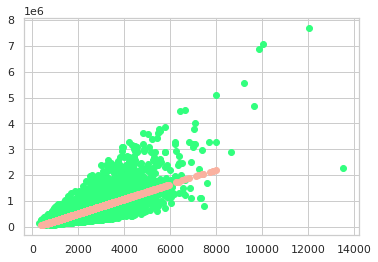

In [47]:
#그래프로 확인하기
plt.scatter(X_train, y_train, color='#32ff7e', linewidth=1)
plt.scatter(X_test, y_pred, color='#fab1a0', linewidth=1);

# 다중회귀분석 (Multivariate Regression)

: 여러 개의 독립 변수가 종속 변수에 영향을 주고 선형 관계를 갖는 경우에 다중회계분석을 사용한다. 

다중회귀분석 알고리즘은 각 독립변수의 계수(a)와 상수항(b)에 적절한 값들을 찾아서 모형을 완성한다.

특성 Feature가 2개 이상

수학함수 : Y = b + a1X1 + a2X2 + ... + anXn

- Features : sqft_living, grade, sqft_above
- Target : price

In [50]:
# 다중회귀분석모델 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
features = ['sqft_living','sqft_above', 'grade']
target = ['price']
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

# 모델 학습하기
model.fit(X_train, y_train)
y_pred = model.predict(X_train)

# 예측하기
y_pred = model.predict(X_test)
y_pred

array([[119969.08317796],
       [482419.95610751],
       [274056.58969729],
       ...,
       [431147.48803214],
       [586037.50680831],
       [469262.17189153]])

In [51]:
# intercept(y절편) & coefficients(회계계수)
model.intercept_, model.coef_

(array([-645017.82231933]),
 array([[ 2.38182179e+02, -7.37098763e+01,  1.06390539e+05]]))

In [52]:
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
models_and_scores = []

model_score = model.score(X_test,y_test)
r_square = metrics.r2_score(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
ev = metrics.explained_variance_score(y_test, y_pred)

print(f'Model Score        :  {model_score:,.2f}')
print(f'R Square           :  {r_square:,.2f}')
print(f'MSE                :  {mse:,.2f}')
print(f'RMSE               :  {mse**(1/2):,.2f}')
print(f'MAE                :  {mae:,.2f}')
print(f'Explained Variance :  {ev:,.2f}')

Model Score        :  0.52
R Square           :  0.52
MSE                :  63,774,169,860.85
RMSE               :  252,535.48
MAE                :  168,019.13
Explained Variance :  0.52
